# GRIP : The Spark Foundation - December 2022

### Task 2 : Prediction using unsupervised ML 

### Author : Hemangi Gavande 

### Predict the optimum number of clusters and represent it visually 

### 1. Importing Required Libraries 

In [79]:
# Importing the Header Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2. Loading the Iris dataset from sklearn 

In [80]:
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [81]:
iris_x_df.shape

(150, 4)

In [82]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [83]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 3.Check for any outliers in the numeric data

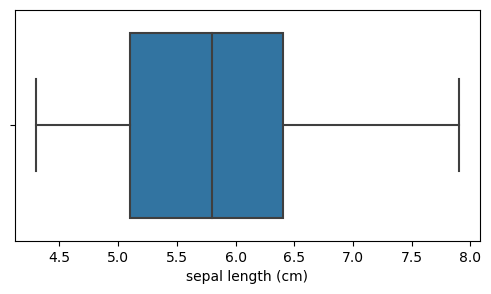

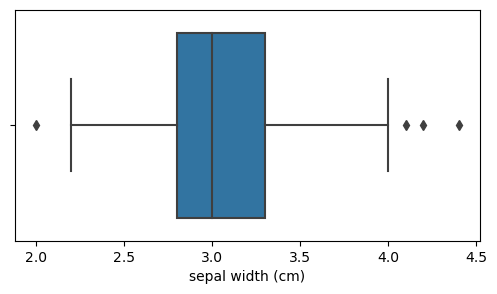

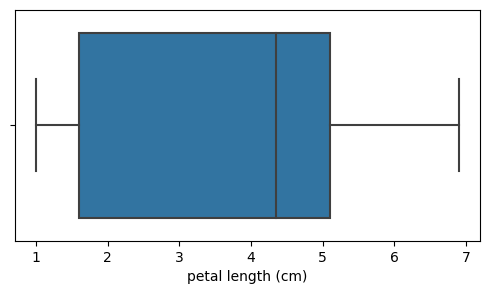

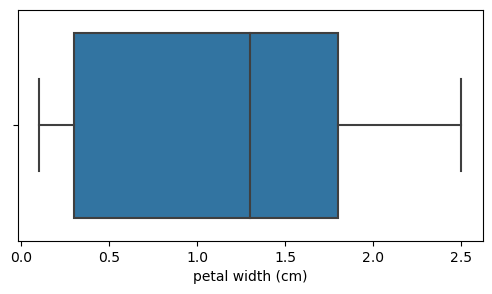

In [84]:
for i in iris_x_df.columns:
    if iris_x_df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris_x_df[i])
        plt.show()

### 4.Treating outliers present in the SepalwidthCm column


In [85]:
q1,q3 = np.percentile(iris_x_df['sepal width (cm)'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 - (1.5*iqr)
iris_x_df['sepal width (cm)'] = iris_x_df['sepal width (cm)'].apply(lambda x: upper_fence if x>upper_fence
                                                           else lower_fence if x<lower_fence else x)

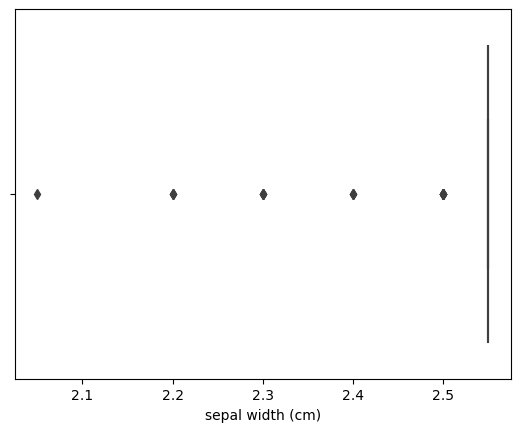

In [86]:
sns.boxplot(iris_x_df['sepal width (cm)']);

### 5. Understanding the data 

In [87]:
iris_x_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,2.527333,3.758000,1.199333
std,0.828066,0.076760,1.765298,0.762238
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.550000,1.600000,0.300000
50%,5.800000,2.550000,4.350000,1.300000
75%,6.400000,2.550000,5.100000,1.800000
max,7.900000,2.550000,6.900000,2.500000


### 6. K-means Clustering


In [100]:
# Finding the optimum number of clusters for k-means classification

x = iris_x_df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []  ##Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

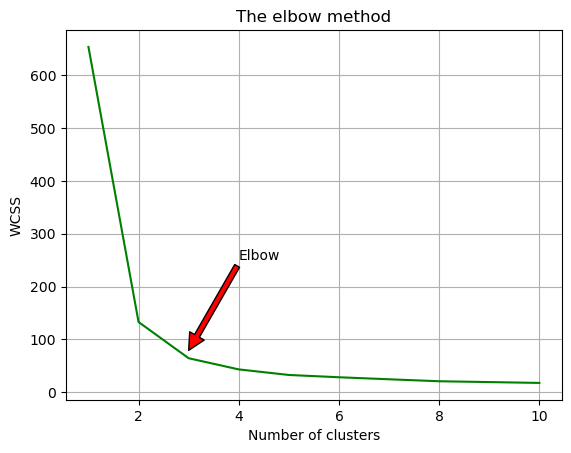

In [101]:
# Plotting the results onto a line graph
# allowing us to observe 'The elbow'
plt.plot(range(1,11), wcss, color = 'g')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.annotate('Elbow', xytext=(4,250), xy=(3,79), arrowprops={'facecolor':'red'})
plt.grid()
plt.show()

#### Elbow occurs where the line graph bends and wcss(within cluster sum of squares) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 3. 

### 7.Create and Train the Model(KMeans)

In [105]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
              max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### 8. Visualizing the Clusters by plotting scatter graph 

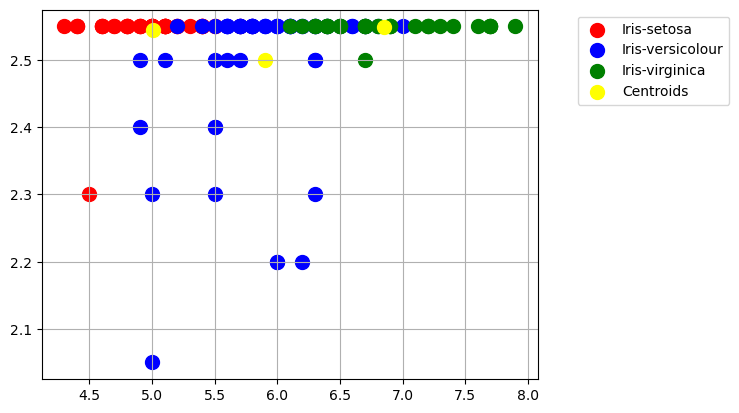

In [112]:
# plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = 'green', label = 'Iris-virginica')

# plotting the centroids of each clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.grid()


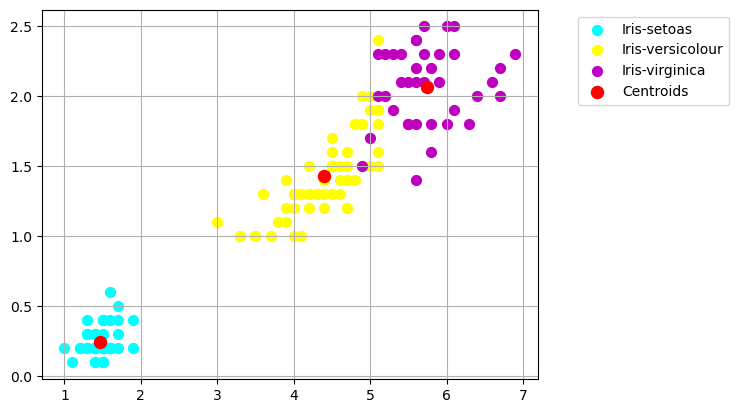

In [111]:
# plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],
            s = 50, c = 'cyan', label = 'Iris-setoas')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],
           s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
           s = 50, c = 'm', label = 'Iris-virginica')

# plotting the centroids of each clusters

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
           s = 75, c = 'red', label = 'Centroids')

plt.legend(loc = 1, bbox_to_anchor = (1.4, 1))
plt.grid()

## THANK YOU!